# Music Dataset Analysis

In [1]:
import muspy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm, trange
import os
import pdb

In [5]:
fpath = 'scottish-midi/'
file_list = os.listdir(fpath)
all_data = []
all_rolls = {}
for fname in tqdm(file_list):
    mus_in = muspy.read_midi(fpath+fname)
    all_data.append(describe_data(mus_in))
    all_rolls[fname[:-4]] = music_to_proll(mus_in)

100%|██████████| 136/136 [00:09<00:00, 13.82it/s]


In [6]:
pd.set_option('display.max_rows', None)
music_df = pd.DataFrame(data=all_data, columns=['title', 'tracks', 'min_note', 'max_note', 'duration', 'inst_nos', 'inst_names', 'n_drum', 'time_sig', 'tempo'])
music_df

,title,tracks,min_note,max_note,duration,inst_nos,inst_names,n_drum,time_sig,tempo
0,24medley,3,33,81,5023,"[71, 110, 112]","[reed, ethnic, ethnic]",0,2/4,90.000090
1,34medley,3,33,81,8610,"[71, 110, 112]","[reed, ethnic, ethnic]",0,3/4,94.000128
2,44medley,3,33,81,4879,"[71, 110, 112]","[reed, ethnic, ethnic]",0,4/4,97.000110
3,4marys,7,45,81,5208,"[8, 8, 8, 43, 8, 25, 25]","[piano, piano, piano, strings, piano, guitar, ...",0,3/4,120.000000
4,68medley,3,33,81,7543,"[71, 110, 112]","[reed, ethnic, ethnic]",0,6/8,139.000218
5,79thfare,7,36,79,7756,"[42, 24, -1, 1, 34, 24, 8]","[strings, organ, drums, piano, bass, organ, pi...",1,2/4,93.000042
6,afton,6,34,79,4992,"[1, 1, 26, 43, 26, 34]","[piano, piano, guitar, strings, guitar, bass]",0,3/4,110.000110
7,alandale,7,38,79,7776,"[24, 24, 1, 33, 49, 49, 26]","[organ, organ, piano, bass, ensemble, ensemble...",0,3/4,123.000221
8,alaurie,6,43,77,5016,"[1, 1, 43, 24, 24, 25]","[piano, piano, strings, organ, organ, guitar]",0,4/4,96.000000
9,amgrace,6,38,81,3528,"[71, 71, 110, 57, 59, 112]","[reed, reed, ethnic, brass, brass, ethnic]",0,3/4,60.000000


In [7]:
mus_valid = music_df.loc[((music_df.time_sig=='2/4') | (music_df.time_sig=='4/4') | (music_df.time_sig=='2/2'))]
len(mus_valid)

78

## Time Sigs

In [8]:
ts_val = mus_valid.time_sig.unique()
ts_count_val = [len(mus_valid.loc[mus_valid.time_sig==t]) for t in ts_val]

ts_all = music_df.time_sig.unique()
ts_count_all = [len(music_df.loc[music_df.time_sig==t]) for t in ts_all]

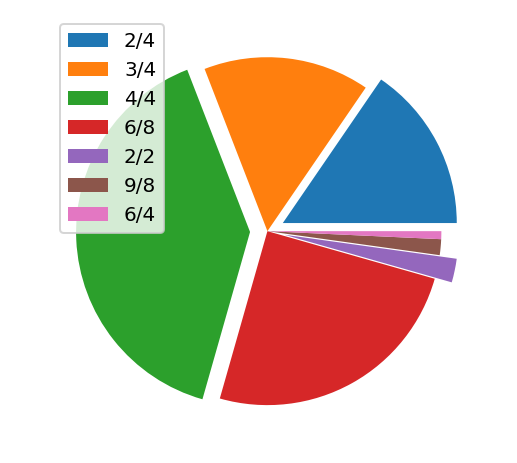

In [9]:
props = np.round(100.*np.array(ts_count_all)/len(mus_valid),1)
pie_all = plt.pie(ts_count_all,labels=props,textprops={'color':'w'},explode=(0.1,0,0.1,0,0.1,0,0))
plt.legend(ts_all)

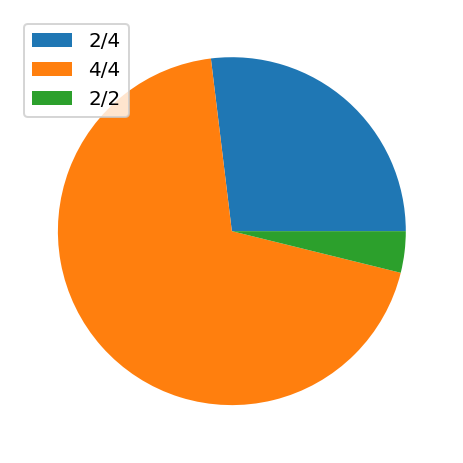

In [10]:
pie_val = plt.pie(ts_count_val)
plt.legend(ts_val)

## Notes

(array([ 3., 11.,  9., 13.,  9., 23.,  3.,  3.,  0.,  4.]),
 array([ 1596. ,  2450.8,  3305.6,  4160.4,  5015.2,  5870. ,  6724.8,
         7579.6,  8434.4,  9289.2, 10144. ]),
 <BarContainer object of 10 artists>)

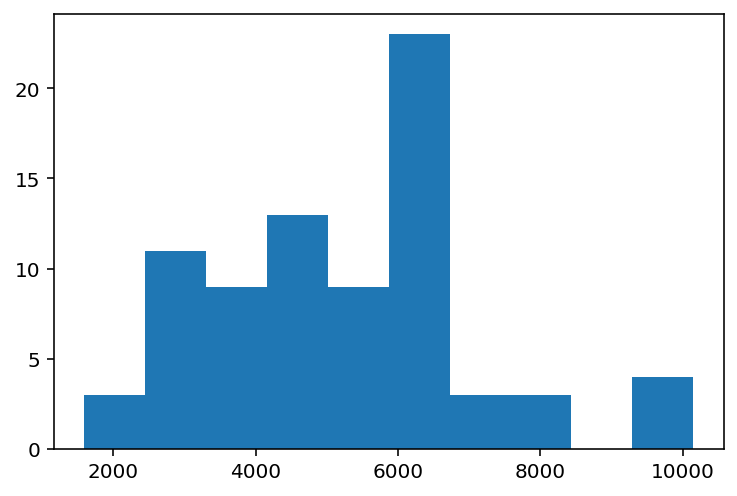

In [11]:
plt.hist(mus_valid.duration.values)

(array([ 2.,  5., 10.,  9., 16., 19.,  4.,  7.,  3.,  3.]),
 array([28. , 29.8, 31.6, 33.4, 35.2, 37. , 38.8, 40.6, 42.4, 44.2, 46. ]),
 <BarContainer object of 10 artists>)

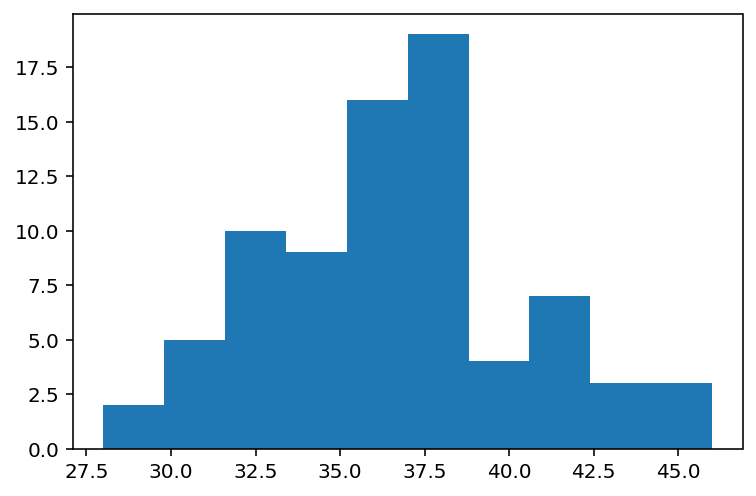

In [12]:
plt.hist(mus_valid.min_note.values)

(array([ 4.,  9., 25., 30.,  6.,  2.,  1.,  0.,  0.,  1.]),
 array([ 72. ,  75.3,  78.6,  81.9,  85.2,  88.5,  91.8,  95.1,  98.4,
        101.7, 105. ]),
 <BarContainer object of 10 artists>)

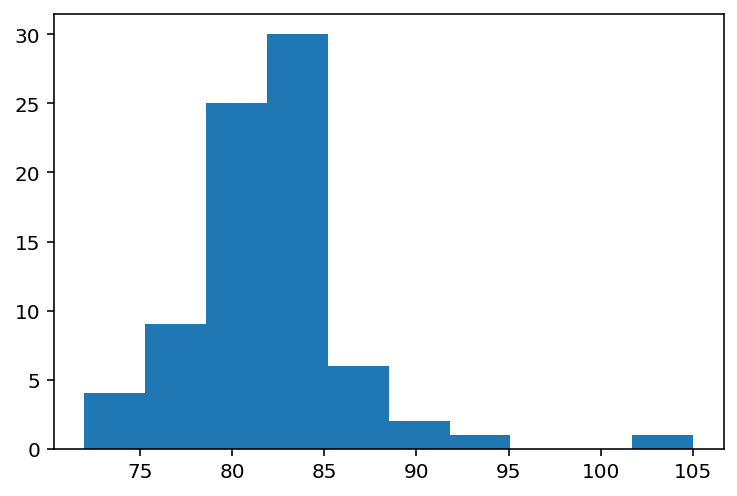

In [13]:
plt.hist(mus_valid.max_note.values)

## Tracks

In [9]:
sample_load = np.load('haggis_balancedDataset_100Epochs_7/eval/19656_test_bernoulli.npy', allow_pickle=True).tolist()

In [11]:
sample_load['score_matrix_mean']

array([[1.        , 0.125     , 0.2265625 , 0.0546875 , 0.328125  ,
        0.5859375 , 0.4140625 , 1.        ],
       [       nan, 5.19642857, 2.91919192, 3.15702479, 2.05813953,
        1.33962264, 2.17333333,        nan],
       [       nan, 0.33628432, 0.29356664, 0.55742081, 0.64419362,
        0.68465177, 0.46222496,        nan],
       [       nan, 0.15950521, 0.04440236, 0.06964532, 0.02010659,
        0.00589623, 0.01819444,        nan],
       [       nan, 0.86971489, 0.76182853, 0.41392895, 0.93459014,
        1.        , 1.        ,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [       nan, 2.5       , 1.73737374, 2.18181818, 1.30232558,
        1.16981132, 1.54666667,        nan]])